<a href="https://www.kaggle.com/code/rahulbanerj24/cnn-fashion-mnist?scriptVersionId=182067341" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install opencv-python
!pip install tensorflow
!pip install keras
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 19.1 MB/s eta 0:00:00


In [2]:
#All imports here
import cv2
import pandas as pd
import io
import visualkeras
import os
import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import visualkeras
from keras.utils import plot_model
import math

2024-06-07 14:53:49.851589: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-07 14:53:49.851743: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-07 14:53:50.034611: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
#Data Collection
from keras.datasets import fashion_mnist

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

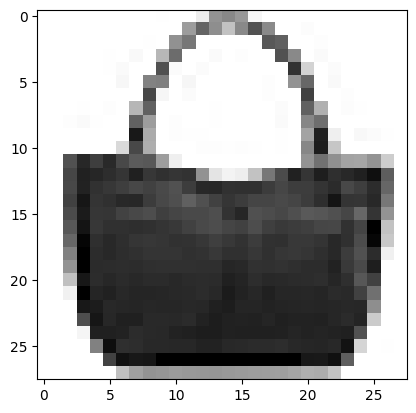

In [6]:
#Image Visualisation
plt.imshow(x_train[100],plt.get_cmap('binary'))

In [7]:
y_train[20000]

7

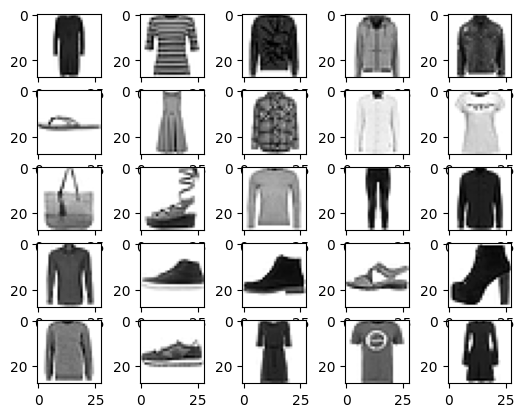

In [8]:
x=1
for i in range(25,50):
    plt.subplot(5,5,x)
    plt.imshow(x_train[i],plt.get_cmap('binary'))
    x+=1

In [9]:
#Encoding
from keras.utils import to_categorical
y_train1=to_categorical(y_train)
y_test1=to_categorical(y_test)

In [10]:
#Build Model
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Dropout,Convolution2D,MaxPooling2D,Flatten
nn=Sequential()

In [11]:
#16 forms of the same image
nn.add(Convolution2D(filters=16,kernel_size=(3,3),input_shape=(28,28,1)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.1))

nn.add(Convolution2D(filters=16,kernel_size=(3,3)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.1))

nn.add(Convolution2D(filters=16,kernel_size=(3,3)))
nn.add(MaxPooling2D(pool_size=(2,2)))
nn.add(BatchNormalization())
nn.add(Dropout(0.1))

nn.add(Flatten())

nn.add(Dense(1000,activation='relu'))
nn.add(Dense(1000,activation='relu'))
nn.add(Dense(1000))

nn.add(Dense(10,activation='softmax'))

In [12]:
#Compile
nn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
#Add Callbacks
from keras.callbacks import EarlyStopping
Early=EarlyStopping(monitor='val_loss',patience=5)

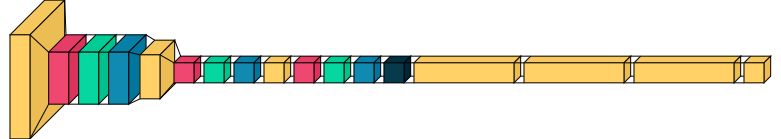

In [14]:
visualkeras.layered_view(nn)

In [15]:
#Fit the model
hist=nn.fit(x_train,y_train1,validation_split=0.2,callbacks=[Early],epochs=5)

Epoch 1/5
1500/1500 [==============================] - 46s 29ms/step - loss: 0.7624 - accuracy: 0.7223 - val_loss: 0.5941 - val_accuracy: 0.7774
Epoch 2/5
1500/1500 [==============================] - 43s 29ms/step - loss: 0.5985 - accuracy: 0.7826 - val_loss: 0.4970 - val_accuracy: 0.8188
Epoch 3/5
1500/1500 [==============================] - 43s 29ms/step - loss: 0.5485 - accuracy: 0.8023 - val_loss: 0.4547 - val_accuracy: 0.8353
Epoch 4/5
1500/1500 [==============================] - 43s 29ms/step - loss: 0.5207 - accuracy: 0.8108 - val_loss: 0.4326 - val_accuracy: 0.8431
Epoch 5/5
1500/1500 [==============================] - 44s 29ms/step - loss: 0.4969 - accuracy: 0.8215 - val_loss: 0.4348 - val_accuracy: 0.8442


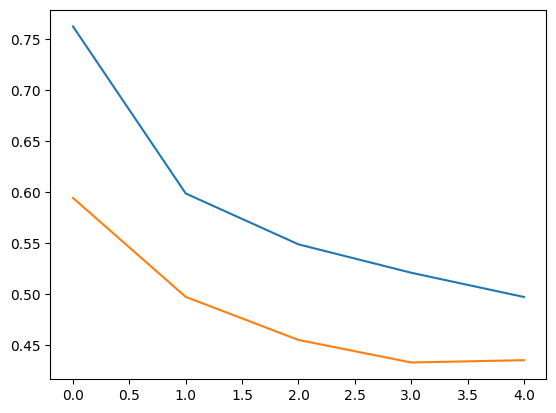

In [16]:
#Visulaise the result
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

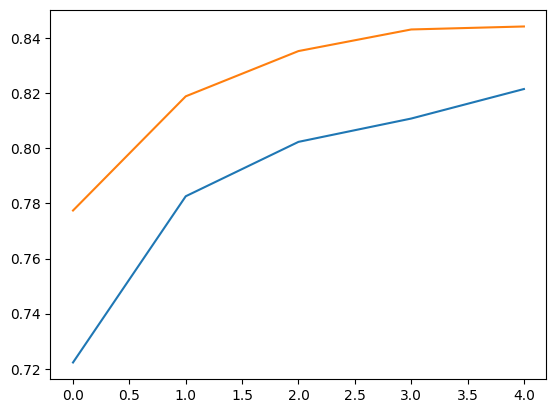

In [17]:
#Accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [18]:
# Evaluation Of Training data
from sklearn.metrics import accuracy_score,classification_report,multilabel_confusion_matrix
import numpy as np

In [19]:
y_pred_train=nn.predict(x_train)
y_pred_train[0]

1875/1875 [==============================] - 15s 8ms/step


array([6.1973432e-10, 1.9966349e-09, 1.7216556e-10, 2.6640627e-09,
       1.0850318e-09, 8.8113738e-05, 2.9926639e-10, 5.0064817e-04,
       5.1238278e-08, 9.9941123e-01], dtype=float32)

In [20]:
y_pred_train1=np.argmax(y_pred_train,axis=-1)
y_pred_train1

array([9, 0, 3, ..., 3, 0, 5])

In [21]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [22]:
#Training Accuracy
acc=accuracy_score(y_pred_train1,y_train)
clf=classification_report(y_pred_train1,y_train)
cnf=multilabel_confusion_matrix(y_pred_train1,y_train)

print('Accuracy:',acc)
print('Confusion matrix:\n',cnf)
print('classification Report:\n',clf)

Accuracy: 0.8522833333333333
Confusion matrix:
 [[[52151   658]
  [ 1849  5342]]

 [[53955   243]
  [   45  5757]]

 [[53148  1862]
  [  852  4138]]

 [[53259   822]
  [  741  5178]]

 [[52006  1102]
  [ 1994  4898]]

 [[53786   445]
  [  214  5555]]

 [[52074  2762]
  [ 1926  3238]]

 [[53399   390]
  [  601  5610]]

 [[53732   273]
  [  268  5727]]

 [[53627   306]
  [  373  5694]]]
classification Report:
               precision    recall  f1-score   support

           0       0.89      0.74      0.81      7191
           1       0.96      0.99      0.98      5802
           2       0.69      0.83      0.75      4990
           3       0.86      0.87      0.87      5919
           4       0.82      0.71      0.76      6892
           5       0.93      0.96      0.94      5769
           6       0.54      0.63      0.58      5164
           7       0.94      0.90      0.92      6211
           8       0.95      0.96      0.95      5995
           9       0.95      0.94      0.94    

In [23]:
ts_pred=nn.predict(x_test)
ts_pred

313/313 [==============================] - 3s 8ms/step


array([[1.10146777e-06, 1.94861559e-06, 3.15390764e-07, ...,
        1.04836160e-02, 2.35839070e-05, 9.86402690e-01],
       [8.82479642e-03, 2.52142374e-04, 9.49217498e-01, ...,
        4.50356492e-06, 1.79073191e-03, 3.96811447e-06],
       [2.40094806e-07, 9.99998510e-01, 6.97522410e-07, ...,
        8.06830691e-09, 1.17938484e-07, 1.51339066e-08],
       ...,
       [4.33144180e-07, 6.84244617e-09, 9.17391318e-09, ...,
        1.23467325e-08, 9.99998868e-01, 3.76944485e-08],
       [3.58678136e-08, 9.99997556e-01, 7.85970968e-08, ...,
        1.64393366e-09, 2.05907504e-08, 2.76396728e-09],
       [9.64128471e-04, 3.88202840e-04, 3.29923787e-04, ...,
        4.67651099e-01, 1.19756237e-02, 1.59946419e-02]], dtype=float32)

In [24]:
y_pred_test=np.argmax(ts_pred,axis=-1)
y_pred_test

array([9, 2, 1, ..., 8, 1, 5])

In [25]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [26]:
#Testing Accuracy
acc1=accuracy_score(y_pred_test,y_test)
clf1=classification_report(y_pred_test,y_test)
cnf1=multilabel_confusion_matrix(y_pred_test,y_test)

print('Accuracy:',acc1)
print('Confusion matrix:\n',cnf1)
print('classification Report:\n',clf1)

Accuracy: 0.8433
Confusion matrix:
 [[[8696  126]
  [ 304  874]]

 [[8993   50]
  [   7  950]]

 [[8844  314]
  [ 156  686]]

 [[8864  154]
  [ 136  846]]

 [[8646  191]
  [ 354  809]]

 [[8958   75]
  [  42  925]]

 [[8657  491]
  [ 343  509]]

 [[8893   60]
  [ 107  940]]

 [[8947   46]
  [  53  954]]

 [[8935   60]
  [  65  940]]]
classification Report:
               precision    recall  f1-score   support

           0       0.87      0.74      0.80      1178
           1       0.95      0.99      0.97       957
           2       0.69      0.81      0.74       842
           3       0.85      0.86      0.85       982
           4       0.81      0.70      0.75      1163
           5       0.93      0.96      0.94       967
           6       0.51      0.60      0.55       852
           7       0.94      0.90      0.92      1047
           8       0.95      0.95      0.95      1007
           9       0.94      0.94      0.94      1005

    accuracy                           0.84 

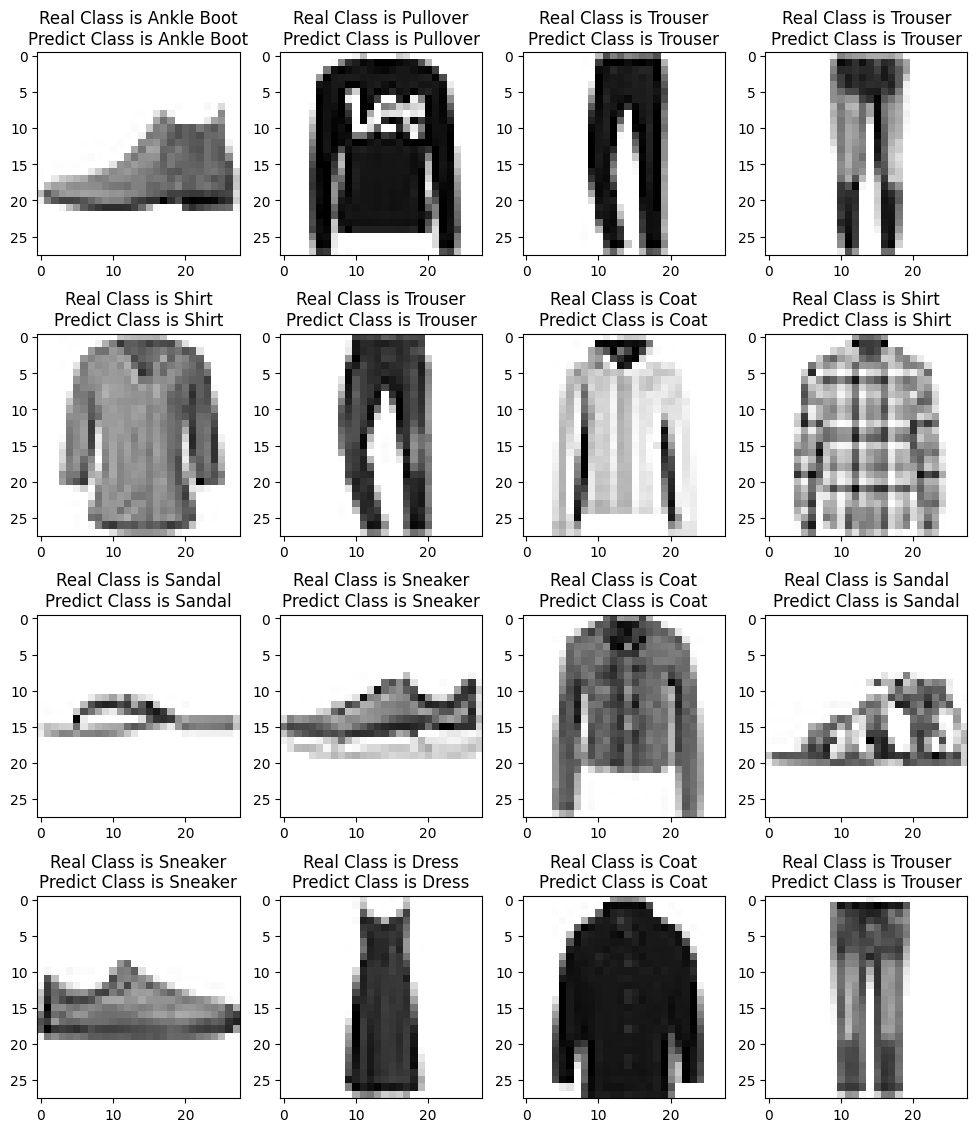

In [27]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

X_test__ = x_test.reshape(x_test.shape[0], 28, 28)
fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_test[i], cmap='binary')
    ax.set(title = f"Real Class is {labels[y_test[i]]}\nPredict Class is {labels[y_pred_test[i]]}");
